In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 17/Support Vector Machine(SVR)/SalaryData_Train(1).csv")
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(30161, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df.duplicated().sum()

3258

In [7]:
# Dropping the duplicate rows
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(26903, 14)

In [9]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Label encoding
le = LabelEncoder()
df['salary_num'] = le.fit_transform(df['Salary'])
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [11]:
#Label encoding
cols = ['workclass','maritalstatus', 'occupation', 'relationship', 'race', 'sex','hoursperweek', 'native']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,39,37,<=50K,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,12,37,<=50K,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,39,37,<=50K,0
3,53,2,11th,7,2,5,0,2,1,0,0,39,37,<=50K,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,39,4,<=50K,0


In [12]:
# Transformation

scaler = MinMaxScaler()
cols = ['age', 'educationno', 'capitalgain','capitalloss']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,0.301370,5,Bachelors,0.800000,4,0,1,4,1,0.02174,0.0,39,37,<=50K,0
1,0.452055,4,Bachelors,0.800000,2,3,0,4,1,0.00000,0.0,12,37,<=50K,0
2,0.287671,2,HS-grad,0.533333,0,5,1,4,1,0.00000,0.0,39,37,<=50K,0
3,0.493151,2,11th,0.400000,2,5,0,2,1,0.00000,0.0,39,37,<=50K,0
4,0.150685,2,Bachelors,0.800000,2,9,5,2,0,0.00000,0.0,39,4,<=50K,0


In [13]:
df.corr()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary_num
age,1.000000,0.075184,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.073117,0.010626,0.223502
workclass,0.075184,1.000000,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.045480,0.012683,0.016577
educationno,0.038048,0.037806,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.147659,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.177846,-0.029585,-0.184559
occupation,-0.004570,0.014047,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.022319,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.251199,-0.006126,-0.247438
race,0.040457,0.051479,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056922,0.118907,0.079109
sex,0.070434,0.079380,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.230841,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.080208,0.012902,0.228865
capitalloss,0.052684,0.002739,0.080025,-0.033890,0.010873,-0.070351,0.032111,0.053084,-0.036023,1.000000,0.049696,0.016784,0.153287


<AxesSubplot:>

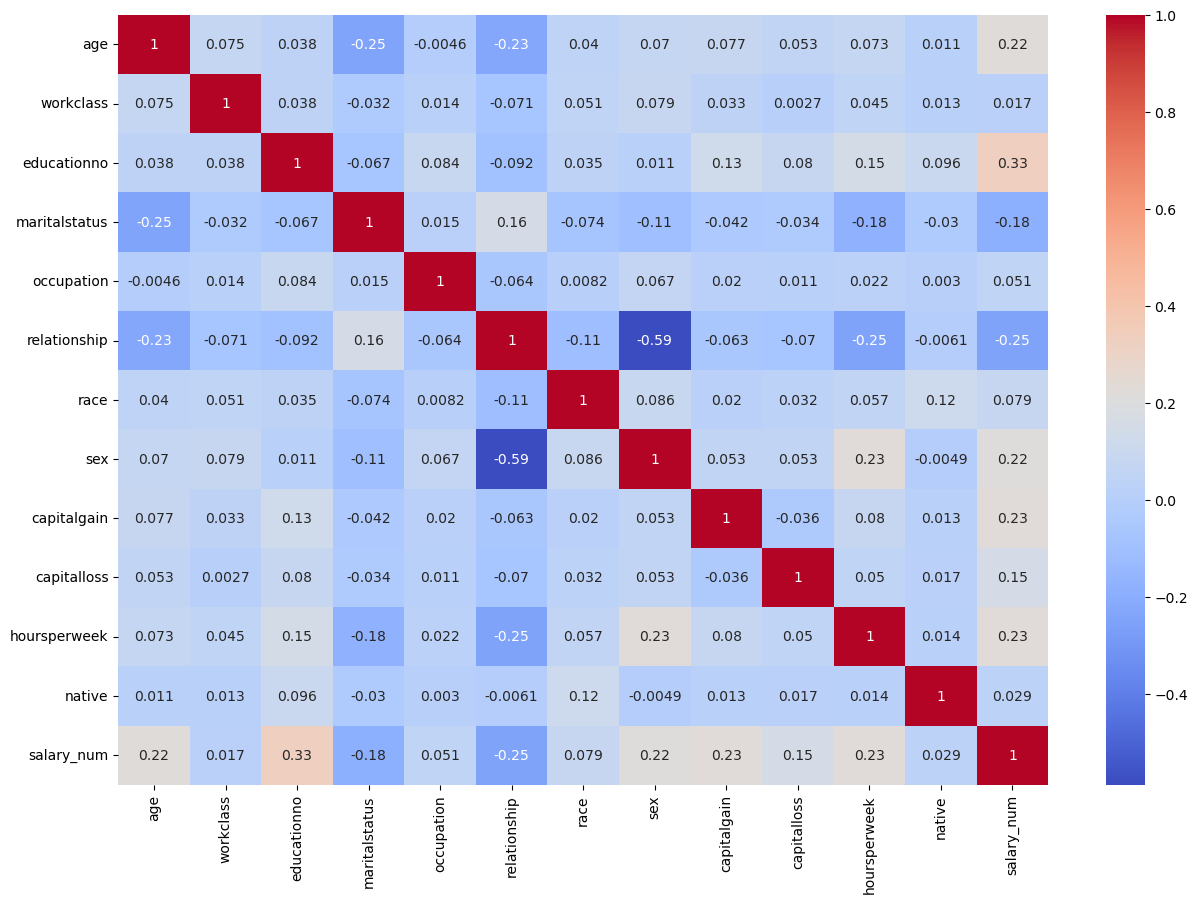

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [15]:
#Salary_num Correlation W.R.T all other features
df.corr()['salary_num']

age              0.223502
workclass        0.016577
educationno      0.332178
maritalstatus   -0.184559
occupation       0.050711
relationship    -0.247438
race             0.079109
sex              0.217360
capitalgain      0.228865
capitalloss      0.153287
hoursperweek     0.228759
native           0.028547
salary_num       1.000000
Name: salary_num, dtype: float64

In [16]:
# Checking whether education and educationno columns are same or not 

df['edu_merge'] = df['education']+'='+(df['educationno'].astype(str))
df['edu_merge'].head()
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num,edu_merge
0,0.301370,5,Bachelors,0.800000,4,0,1,4,1,0.02174,0.0,39,37,<=50K,0,Bachelors=0.8
1,0.452055,4,Bachelors,0.800000,2,3,0,4,1,0.00000,0.0,12,37,<=50K,0,Bachelors=0.8
2,0.287671,2,HS-grad,0.533333,0,5,1,4,1,0.00000,0.0,39,37,<=50K,0,HS-grad=0.5333333333333333
3,0.493151,2,11th,0.400000,2,5,0,2,1,0.00000,0.0,39,37,<=50K,0,11th=0.4
4,0.150685,2,Bachelors,0.800000,2,9,5,2,0,0.00000,0.0,39,4,<=50K,0,Bachelors=0.8


In [17]:
df['edu_merge'].unique()

array([' Bachelors=0.8', ' HS-grad=0.5333333333333333', ' 11th=0.4',
       ' Masters=0.8666666666666667', ' 9th=0.26666666666666666',
       ' Some-college=0.6', ' Assoc-acdm=0.7333333333333334',
       ' 7th-8th=0.2', ' Doctorate=1.0', ' Assoc-voc=0.6666666666666666',
       ' Prof-school=0.9333333333333333', ' 5th-6th=0.13333333333333336',
       ' 10th=0.33333333333333337', ' Preschool=0.0',
       ' 12th=0.4666666666666667', ' 1st-4th=0.06666666666666667'],
      dtype=object)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'educationno'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'native'}>],
       [<AxesSubplot:title={'center':'salary_num'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

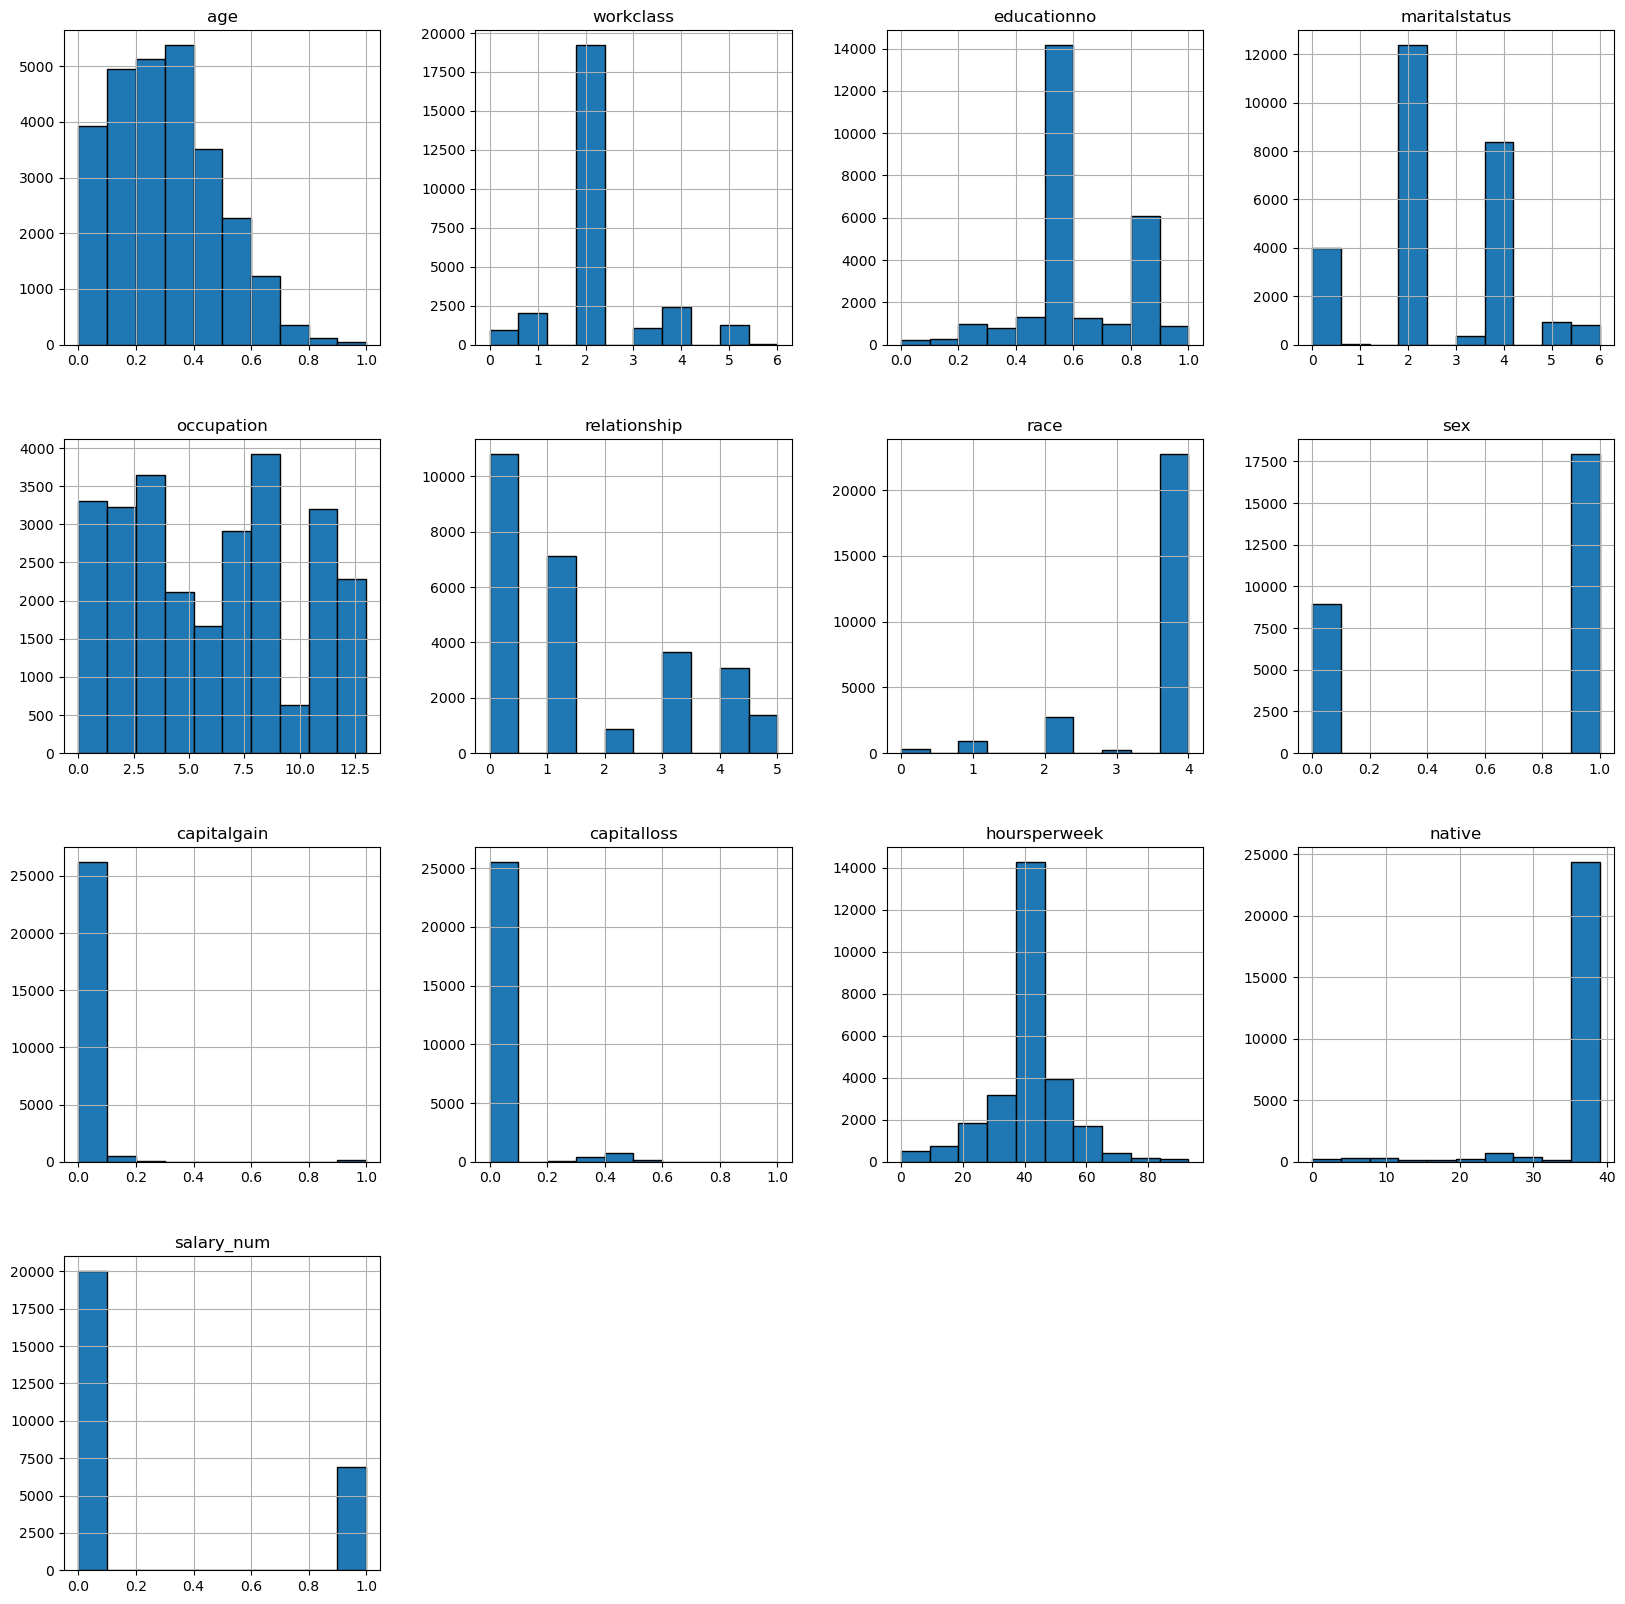

In [18]:
df.hist(edgecolor='black',figsize=(20,20),linewidth=1)

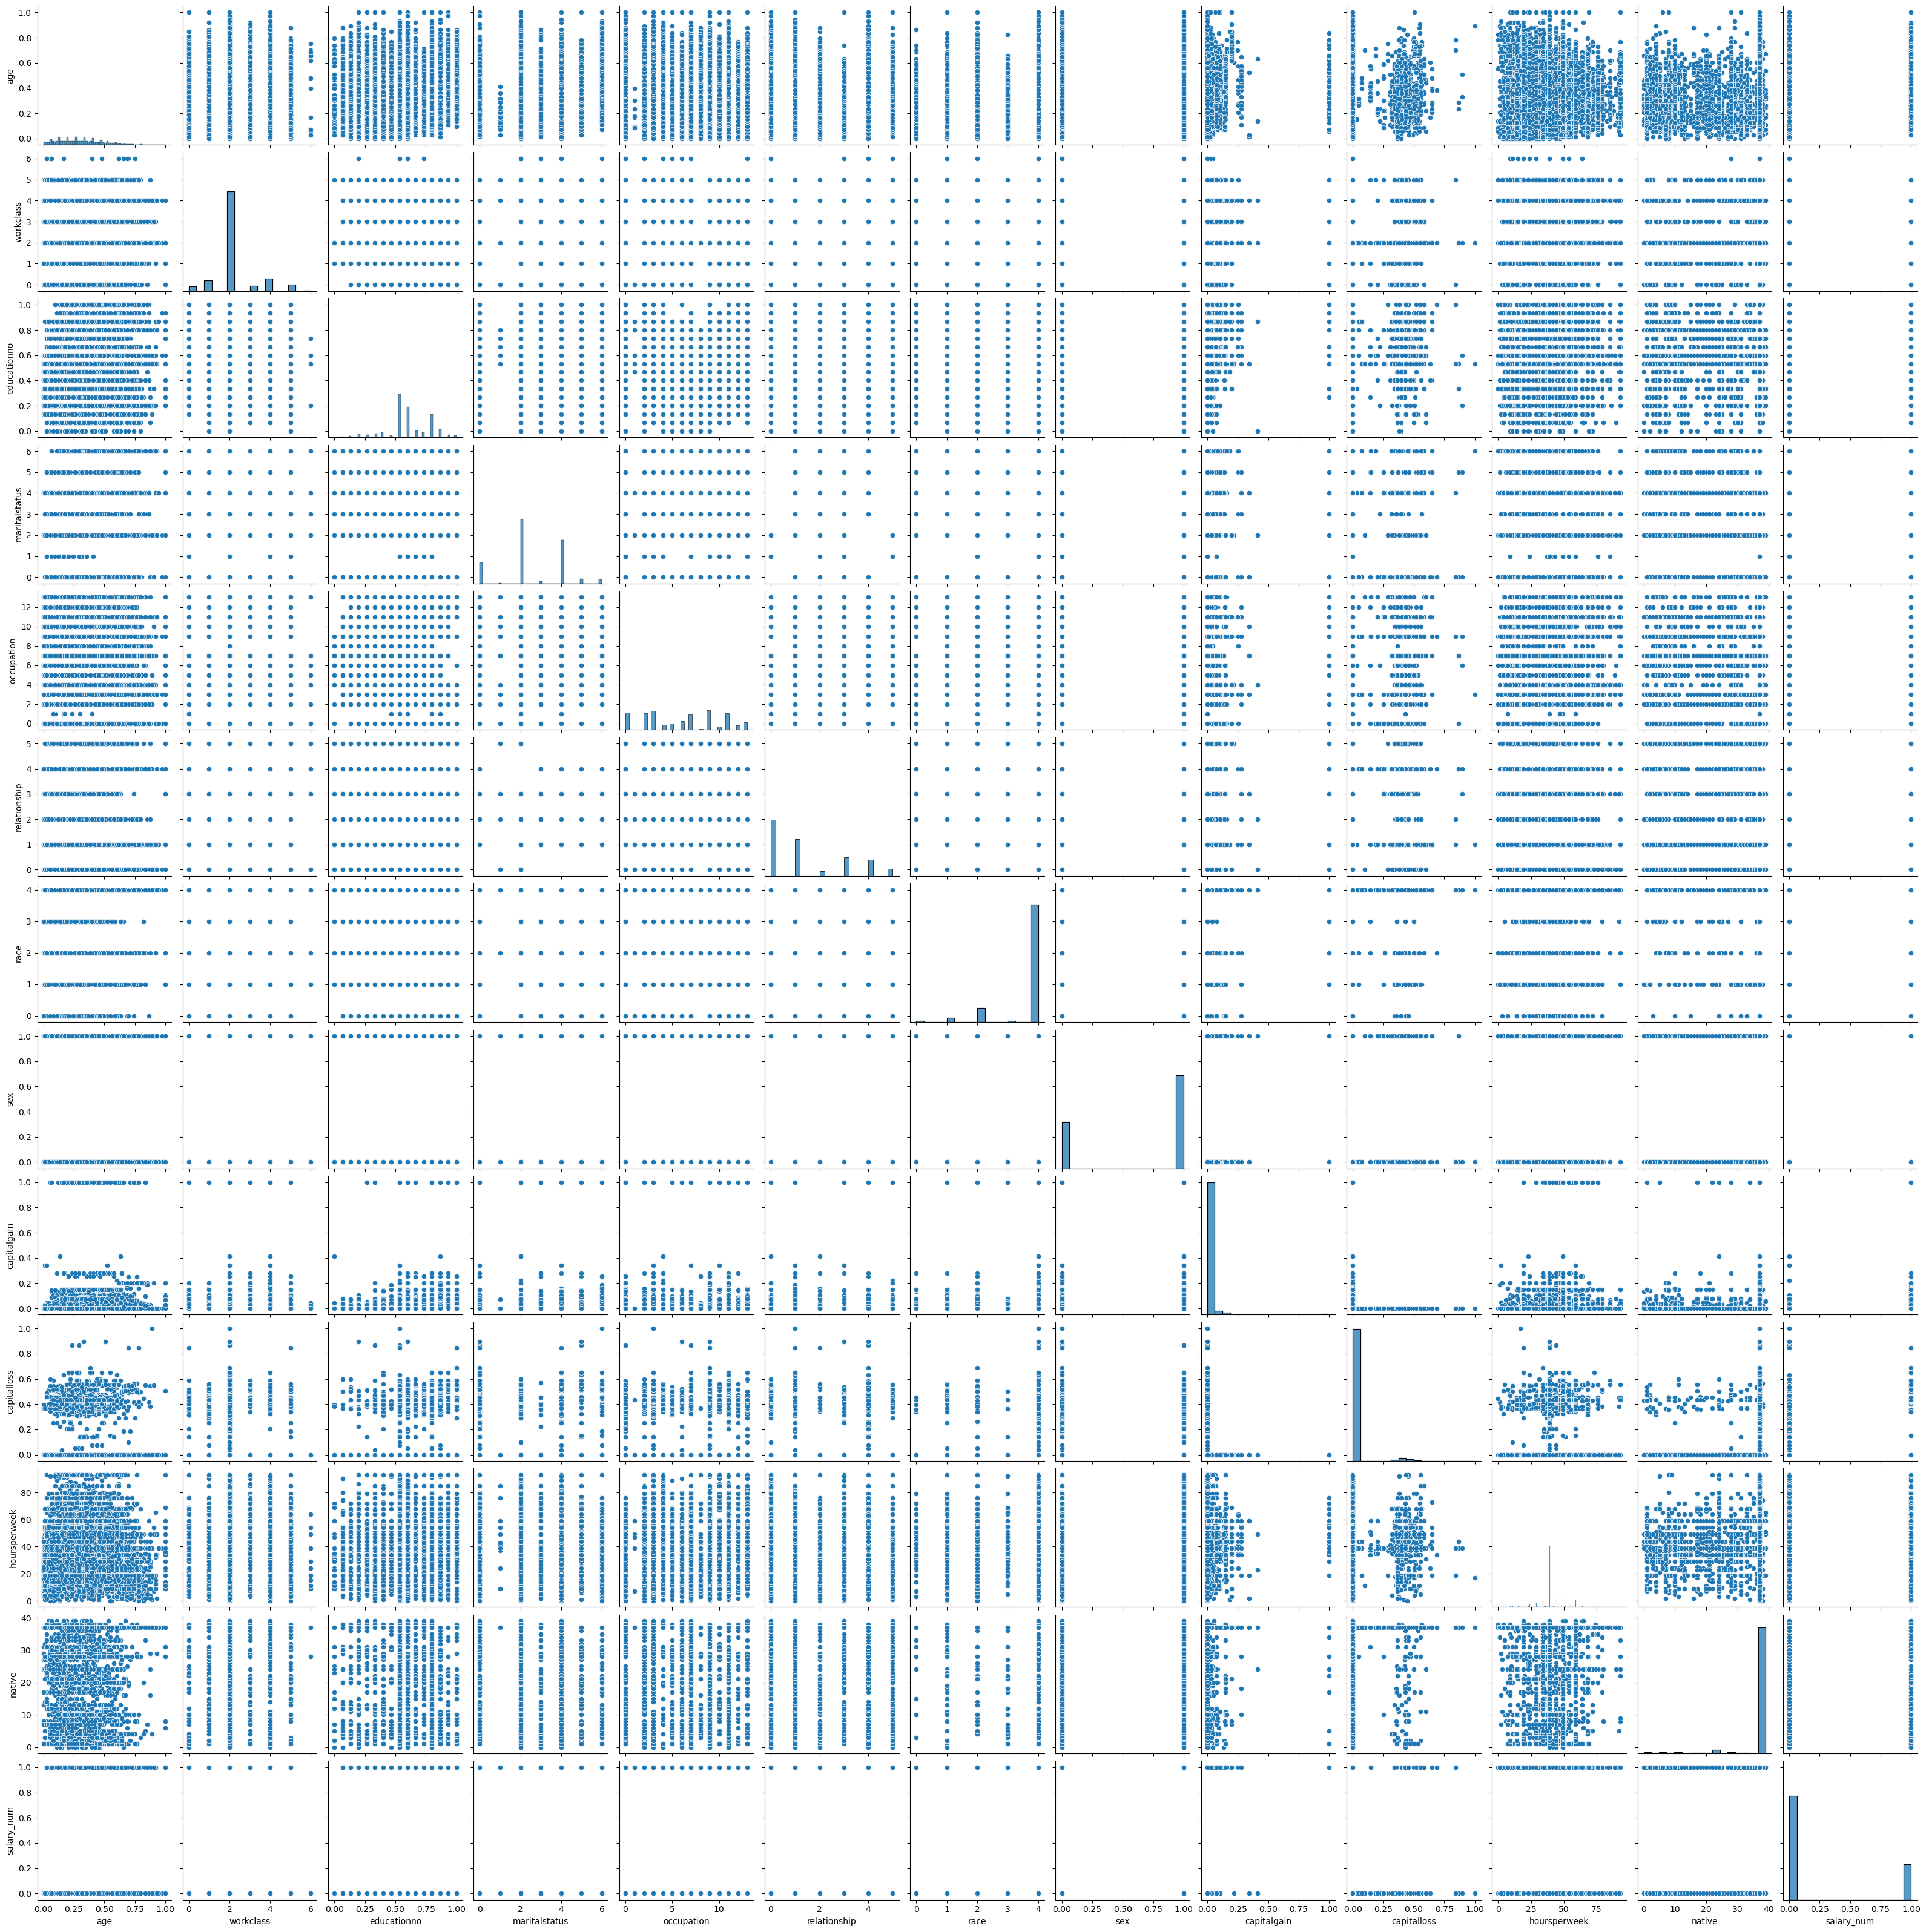

In [19]:
sns.pairplot(df)

In [20]:
data = df.copy()

In [21]:
#Splitting data
X = data.drop(['Salary','salary_num','edu_merge','education'],axis=1)
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,5,0.800000,4,0,1,4,1,0.02174,0.0,39,37
1,0.452055,4,0.800000,2,3,0,4,1,0.00000,0.0,12,37
2,0.287671,2,0.533333,0,5,1,4,1,0.00000,0.0,39,37
3,0.493151,2,0.400000,2,5,0,2,1,0.00000,0.0,39,37
4,0.150685,2,0.800000,2,9,5,2,0,0.00000,0.0,39,4


In [22]:
Y = data['salary_num']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary_num, dtype: int32

In [23]:
# Training data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# SVC Algorithm


# Using Grid search CV

In [24]:
# Grid search CV to find better parameters based on SVC
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[0.5],'degree': [1],'C':[0.1] }] # Used rbc method and few values of C, degree and gamma as well. Have taken random values as it is taking long time to run
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1], 'degree': [1], 'gamma': [0.5],
                          'kernel': ['poly']}])

In [25]:
gsv.best_score_,gsv.best_params_

(0.7958373549831912, {'C': 0.1, 'degree': 1, 'gamma': 0.5, 'kernel': 'poly'})

In [26]:
clf = SVC(C=0.1, degree = 1, gamma=0.5, kernel='poly')
clf.fit(X_train,y_train)

SVC(C=0.1, degree=1, gamma=0.5, kernel='poly')

In [27]:
#Predicting the values 
y_pred = clf.predict(X_test)

#Accuracy of model
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

# Confusion matrix
confusion_matrix(y_test, y_pred)

Accuracy = 79.61345474818808


array([[3872,  108],
       [ 989,  412]], dtype=int64)

In [28]:
#Accuracy of model
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.61345474818808


# Testing the model/ prediction using test data

In [29]:
test_data = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 17/Support Vector Machine(SVR)/SalaryData_Test(1).csv")
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
#Cleaning test data
test_data = test_data.drop(['education'], axis=1)
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [31]:
#Converting categorical to Numeric
le = LabelEncoder()
test_data['salary_num'] = le.fit_transform(test_data['Salary'])
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [32]:
# Converting all categorical columns to numeric using label encoder
cols = ['workclass','maritalstatus', 'occupation', 'relationship', 'race', 'sex','hoursperweek', 'native']
test_data[cols] = test_data[cols].apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,25,2,7,4,6,3,2,1,0,0,39,37,<=50K,0
1,38,2,9,2,4,0,4,1,0,0,49,37,<=50K,0
2,28,1,12,2,10,0,4,1,0,0,39,37,>50K,1
3,44,2,10,2,6,0,2,1,7688,0,39,37,>50K,1
4,34,2,6,4,7,1,4,1,0,0,29,37,<=50K,0


In [33]:
# Dropping the duplicate rows
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num,edu_merge
0,0.301370,5,Bachelors,0.800000,4,0,1,4,1,0.02174,0.0,39,37,<=50K,0,Bachelors=0.8
1,0.452055,4,Bachelors,0.800000,2,3,0,4,1,0.00000,0.0,12,37,<=50K,0,Bachelors=0.8
2,0.287671,2,HS-grad,0.533333,0,5,1,4,1,0.00000,0.0,39,37,<=50K,0,HS-grad=0.5333333333333333
3,0.493151,2,11th,0.400000,2,5,0,2,1,0.00000,0.0,39,37,<=50K,0,11th=0.4
4,0.150685,2,Bachelors,0.800000,2,9,5,2,0,0.00000,0.0,39,4,<=50K,0,Bachelors=0.8


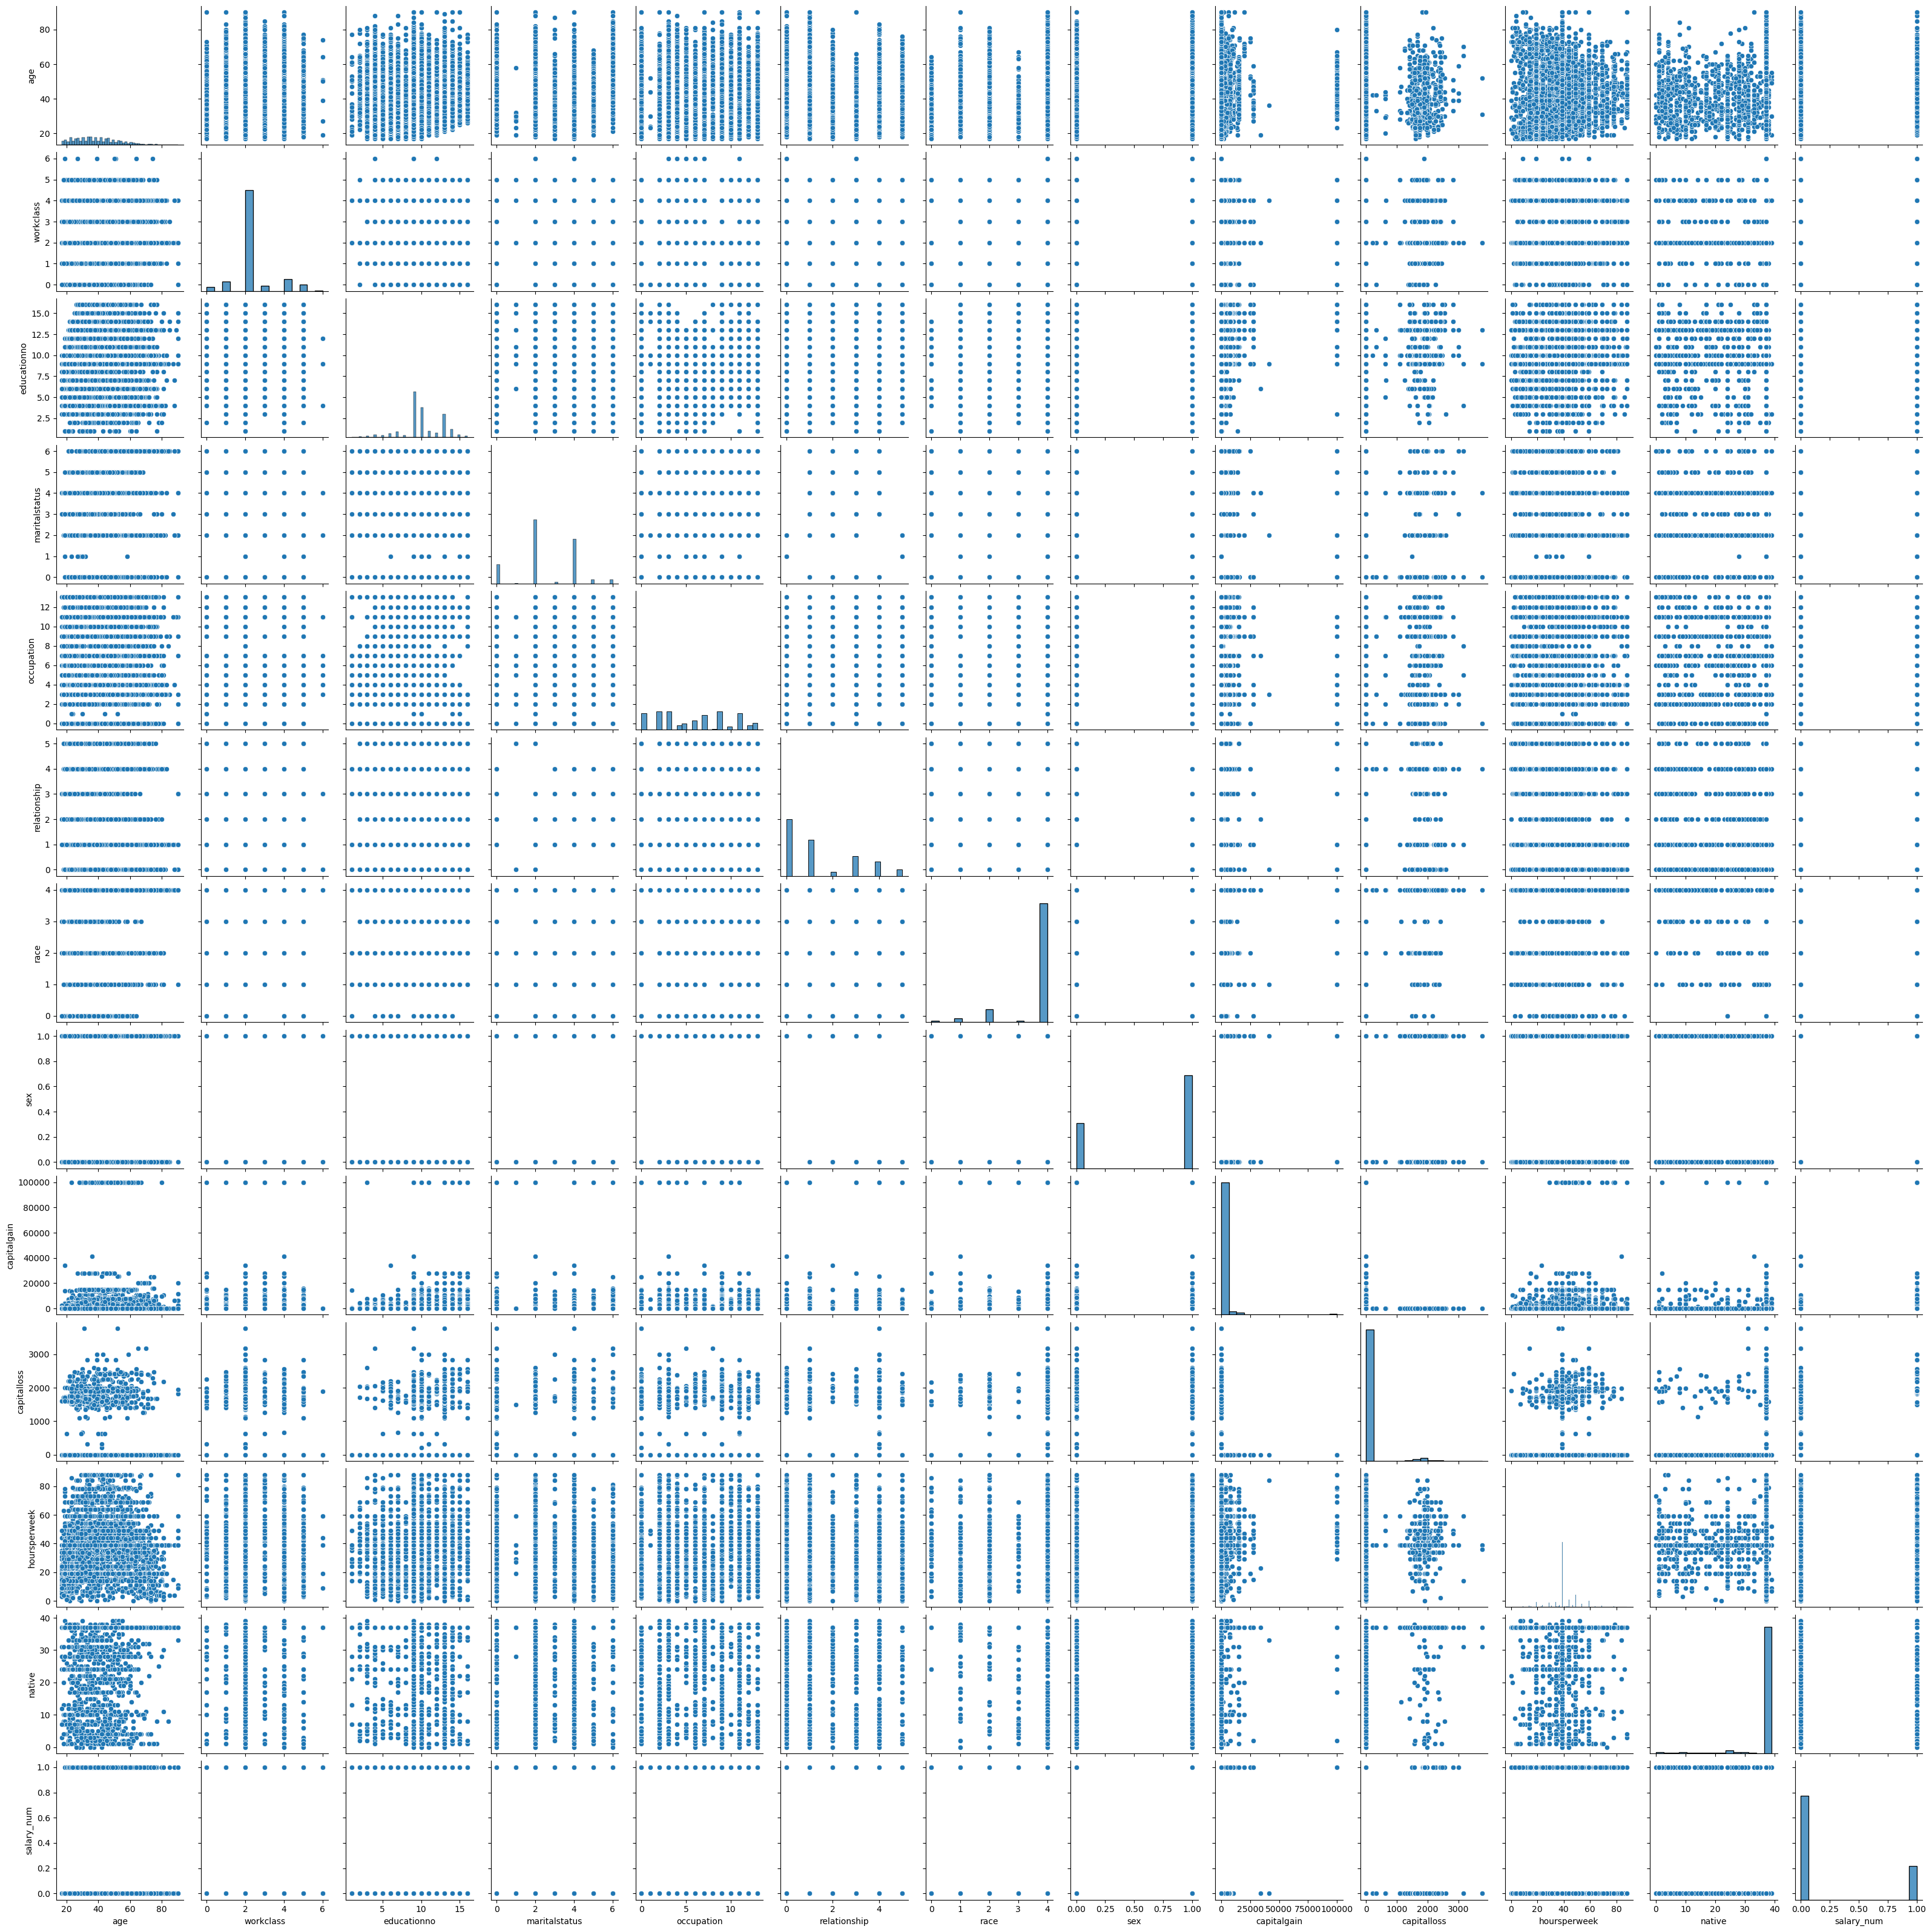

In [34]:
sns.pairplot(test_data)

In [35]:
#Transformation
scaler = MinMaxScaler()
cols = ['age', 'educationno', 'capitalgain','capitalloss']
test_data[cols] = scaler.fit_transform(test_data[cols])
test_data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_num
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37,<=50K,0
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37,<=50K,0
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37,>50K,1
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37,>50K,1
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37,<=50K,0


In [36]:
X1 = test_data.drop(['Salary','salary_num'],axis=1)
Y1 = test_data['salary_num']

In [37]:
X1

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,2,0.400000,4,6,3,2,1,0.000000,0.0,39,37
1,0.287671,2,0.533333,2,4,0,4,1,0.000000,0.0,49,37
2,0.150685,1,0.733333,2,10,0,4,1,0.000000,0.0,39,37
3,0.369863,2,0.600000,2,6,0,2,1,0.076881,0.0,39,37
4,0.232877,2,0.333333,4,7,1,4,1,0.000000,0.0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,2,0.800000,4,9,3,4,1,0.000000,0.0,39,37
15056,0.301370,2,0.800000,0,9,1,4,0,0.000000,0.0,35,37
15057,0.287671,2,0.800000,2,9,0,4,1,0.000000,0.0,49,37
15058,0.369863,2,0.800000,0,0,3,1,1,0.054551,0.0,39,37


In [38]:
Y1

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: salary_num, Length: 15060, dtype: int32

In [39]:
x_train,x_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [40]:
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[0.5],'degree': [1],'C':[0.1] }] # Used rbc method and few values of C, degree and gamma as well. Have taken random values as it is taking long time to run
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1], 'degree': [1], 'gamma': [0.5],
                          'kernel': ['poly']}])

In [41]:
gsv.best_score_,gsv.best_params_

(0.7988869742628306, {'C': 0.1, 'degree': 1, 'gamma': 0.5, 'kernel': 'poly'})

In [42]:
clf = SVC(C=0.1, degree = 1, gamma=0.5, kernel='poly')
clf.fit(x_train,Y_train)

SVC(C=0.1, degree=1, gamma=0.5, kernel='poly')

In [43]:
#Predicting the values 
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
# Confusion matrix
confusion_matrix(Y_test, y_pred)

array([[2210,   74],
       [ 541,  187]], dtype=int64)

In [45]:
#Accuracy of model
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.5816733067729
